# Assignment 2

### Question 1) 
Read the "earthquake.csv" file as a DataFrame object. 
Each row represents a report sent from someone’s mobile phone indicating an emergency or some other problem. Each has an associated timestamp as "incident date" and a location as "latitude" and "longitude". Print the first 10 records for these 3 columns.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#solution code
earthquake = pd.read_csv("earthquake.csv")
earthquake[["LOCATION","LATITUDE","LONGITUDE"]].head(10)


,LOCATION,LATITUDE,LONGITUDE
0,"Jacmel, Haiti",18.233333,-72.533333
1,fondwa,50.226029,5.729886
2,centrie,22.278381,114.174287
3,Genoca,44.407062,8.933989
4,"Citi Soleil, Haiti",18.571084,-72.334671
5,"Radio Commerce Shelter, Sarthe",18.593707,-72.310079
6,Marc near Baraderes,18.482800,-73.638800
7,unable to find &quot;arcahaie bas Saint-Ard&qu...,18.415000,-73.195000
8,Pernier,18.517443,-72.236841
9,Intersection of Lamentin 54 and Rue St Juste,18.547790,-72.410010


### Question 2)
The CATEGORY field contains a comma-separated list of codes indicating the type of message. Check the rows for missing values in "CATEGORY" column. Show which entries in a dataFrame are missing.

In [4]:
#solution code
checkNull = pd.isnull(earthquake["CATEGORY"])
display(earthquake[checkNull])
        
        

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
1198,2777,"Food needed in Castro area, near airport 10 De...",24/01/2010 23:31,10 Dessaline Road,hungry grangou. We are in the Cit?? Castro a...,NaN,18.567320,-72.293280,YES,NO
1531,2436,Food Needed in Fontamara 27,22/01/2010 23:04,Fontamara 27 (off Rue National 2) Coordinates ...,NOU NAN FONTAMARA 27 PROLONGE NOU PA WE PES?N\...,NaN,18.532570,-72.367540,YES,NO
1828,2130,"15 People, 5 Babies, Water and Food Needed at ...",23/01/2010 18:07,Airport Runway Entrance - one end of the runwa...,nou sou wout aewopo a antre pis la nou se 15 f...,NaN,18.580320,-72.312390,YES,NO
2620,1182,Trapped person,19/01/2010 05:19,"Delmas, 33 Rue Derrosier Impas Du Crist, Numbe...",Mwen.se MADAM LAINE FRITZ MWEN RETE DELMAS 33 ...,NaN,18.559451,-72.295522,YES,NO
2622,1179,500 to 600 people in a temporary shelter with ...,19/01/2010 05:57,"Grand Goave, Haiti",Nou anviron 500 a 600 moun nan abri pwoviswa g...,NaN,18.431400,-72.787200,YES,NO
2623,1178,500 to 600 people in a temporary shelter with ...,19/01/2010 05:57,"Grand Goave, Haiti",Nou anviron 500 a 600 moun nan abri pwoviswa g...,NaN,18.424764,-72.770300,YES,NO


### Question 3) 

If you notice above in the data summary, some of the categories are missing, so we might want to drop these data points. Additionally, call the describe function to show that there are some aberrant locations.
Clean the bad locations by considering conditions below and remove the missing categories. 

Conditions for location: 
- Latitude should be range of between 18 and 20
- Longitude should be range of between -70 and -75
            

In [5]:
#solution code
checkNull = pd.isnull(earthquake["CATEGORY"])

earthquake.drop(earthquake[(18> earthquake['LATITUDE']) & (earthquake['LATITUDE'] >20) & (checkNull)].index, inplace = True)
earthquake.drop(earthquake[(-75> earthquake['LONGITUDE']) & (earthquake['LONGITUDE'] >-70) & (checkNull)].index, inplace = True)

display(pd.isnull(earthquake["CATEGORY"]))

0       False
1       False
2       False
3       False
4       False
        ...  
3588    False
3589    False
3590    False
3591    False
3592    False
Name: CATEGORY, Length: 3593, dtype: bool

Now we might want to do some analysis or visualization of this data by category, but each category field may have multiple categories. Additionally, each category is given as a code plus an English and possibly also a French code name. Thus, a little bit of wrangling is required to get the data into a more agreeable form. First, write the functions to get a list of all the categories and to split each category into a code and an English name

In [48]:
#solution code

0             1. Urgences | Emergency, 3. Public Health, 
1       1. Urgences | Emergency, 2. Urgences logistiqu...
2       2. Urgences logistiques | Vital Lines, 8. Autr...
3                               1. Urgences | Emergency, 
4                               1. Urgences | Emergency, 
                              ...                        
3588                    5c. Route barree | Road blocked, 
3589    5a. Structure effondres | Collapsed structure,...
3590      5a. Structure effondres | Collapsed structure, 
3591       5b. Structures a risque | Unstable Structure, 
3592      5a. Structure effondres | Collapsed structure, 
Name: CATEGORY, Length: 3593, dtype: object

You can better understand how to write a function by looking at the result obtained from the **_get english_** function below.

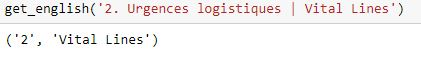

In [16]:
#solution code
def get_english():  #BUNAK BAKKK
    arr = earthquake["CATEGORY"].to_numpy()
    arr2 = []
    arr3 = []
    arr4 = []
    arr5 = []
    for cat in arr:
        if(isinstance(cat,str)):
            arr2.append(cat.split(","))
    for i in arr2:
        arr3.append([ele for ele in i if ele.strip()])
    for i in arr3:
        for j in i:
            arr4.append(j.split(","))
    
    for i in arr4:
        i[0] = i[0].strip()
        first = i[0][:i[0].index(".")]
        if('|' in i[0]):
            last = i[0][i[0].index("|")+1:]
        else:
            last = i[0][i[0].index(".")+1:]
        i[0] = first
        i.append(last)
    for i in arr4:
        if i not in arr5:
            arr5.append(i)
    arr5.remove(arr5[44])
    arr5.remove(arr5[43])
   
    return arr5
    
            
        
            
print(get_english())    

[['1', ' Emergency'], ['3', ' Public Health'], ['2', ' Vital Lines'], ['8', ' Other'], ['5e', ' Communication lines down'], ['4', ' Security Threats'], ['4e', ' Water sanitation and hygiene promotion'], ['2f', ' Power Outage'], ['2d', ' Shelter needed'], ['2a', ' Food Shortage'], ['1a', ' Highly vulnerable'], ['2b', ' Water shortage'], ['7', ' Services Available'], ['6', ' Natural Hazards'], ['3b', ' Chronic care needs'], ['1b', ' Medical Emergency'], ['7d', ' Hospital/Clinics Operating'], ['3d', " OBGYN/Women's Health"], ['8f', ' Other'], ['1d', ' Fire'], ['8a', ' IDP concentration'], ['3a', ' Infectious human disease'], ['8c', ' Price gouging'], ['4c', ' Group violence'], ['5', ' Infrastructure Damage'], ['3e', ' Psychiatric need'], ['2e', ' Fuel shortage'], ['5d', ' Compromised bridge'], ['3c', ' Medical equipment and supply needs'], ['1c', ' People trapped'], ['4a', ' Looting'], ['5a', ' Collapsed structure'], ['7a', ' Food distribution point'], ['7c', ' Non-food aid distribution p

### Question 4)

Write a function to make a dict mapping code to name for "CATEGORY" column.

In [86]:
#solution code
arr = get_english()
english_mapping = {}
for i in arr:
    english_mapping[i[0]] = i[1]
print(english_mapping["6c"])


 Earthquake and aftershocks


You can better understand how to write a function by looking at the result obtained from the **_english_mapping_** below.

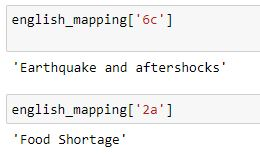

In [ ]:
#solution code

### Question 5) 
Read the "births.csv" file as a DataFrame object. Use a pivot table to understand the data. Add a column called "quinquennial" to analyze male and female total births every five years.

In [3]:
#solution code
birth = pd.read_csv("births.csv")
birth_pivot = pd.pivot_table(data=birth, values='births', columns='gender', index='year', aggfunc=sum)
i= 0
for row in birth_pivot.index:
    if(row %5 == 4):
        if(row == 1969):
            x = 1
            while(x < 5):
                birth_pivot.at[row,'F'] += birth_pivot.iloc[i+x, 0]
                                            
                birth_pivot.at[row,'M'] += birth_pivot.iloc[i+x, 1]
                x+=1
                                             
        else:
            birth_pivot.at[row,'F']+= birth_pivot.iloc[i-1,0]
            birth_pivot.at[row,'M']+= birth_pivot.iloc[i-1,1]
            x=1
            while(x<5):            
                birth_pivot.at[row,'F']+= birth_pivot.iloc[i+x, 0]
                                             
                birth_pivot.at[row,'M']+= birth_pivot.iloc[i+x,1]
                x+=1
                                                 
        i+=1
    else:
        birth_pivot = birth_pivot.drop(row)
birth_pivot.columns = ['_'.join(str(s).strip() for s in col if s) for col in birth_pivot.columns]
birth_pivot.reset_index(inplace = True)
birth_pivot = birth_pivot.rename(columns = {'year':'quinquennial'})
birth_pivot


,quinquennial,F,M
0,1969,8435021,8878893
1,1974,16310872,17174164
2,1979,25123743,26442862
3,1984,34353348,36139593
4,1989,44308201,46582643
5,1994,53872004,56603172
6,1999,63727445,66930018
7,2004,74035823,77738555


### Question 6)
Plot the total number of US births by year and gender to see the annual trend in births by gender. Make your own comment for the graph.

<AxesSubplot:xlabel='year'>

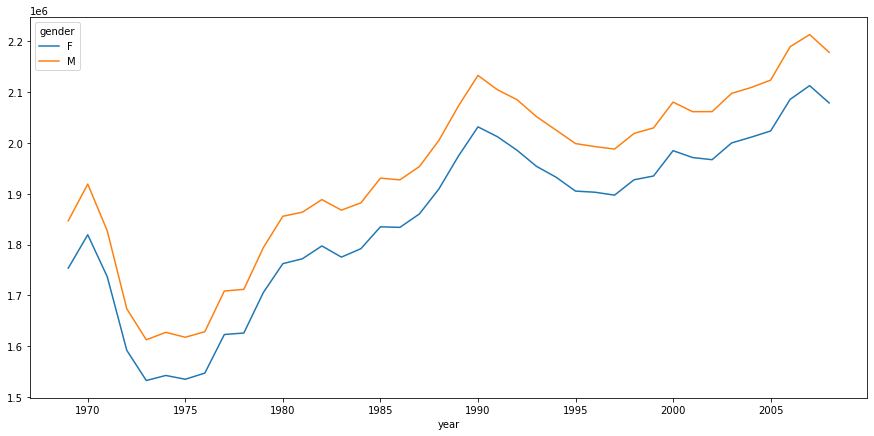

In [4]:
#solution code
gp = birth.groupby(['year','gender'], as_index = False).sum()
pivot = pd.pivot_table(data=birth, values='births', columns='gender', index='year', aggfunc=sum)
plt.rcParams["figure.figsize"] = [15.0,7.0]
pivot.plot()

#Between 1970 and 1973 there is a strict decreasing in the number of birth for both gender.
# After 1975, number of birth is generally grew up untill 1991.
# Between 1991, number of birth is decreased both for male and female.



### Question 7)
Display the mean of birth values for females and males in the same histogram.

Note: x-axis: mean values, y-axis: year of birth

<AxesSubplot:xlabel='year'>

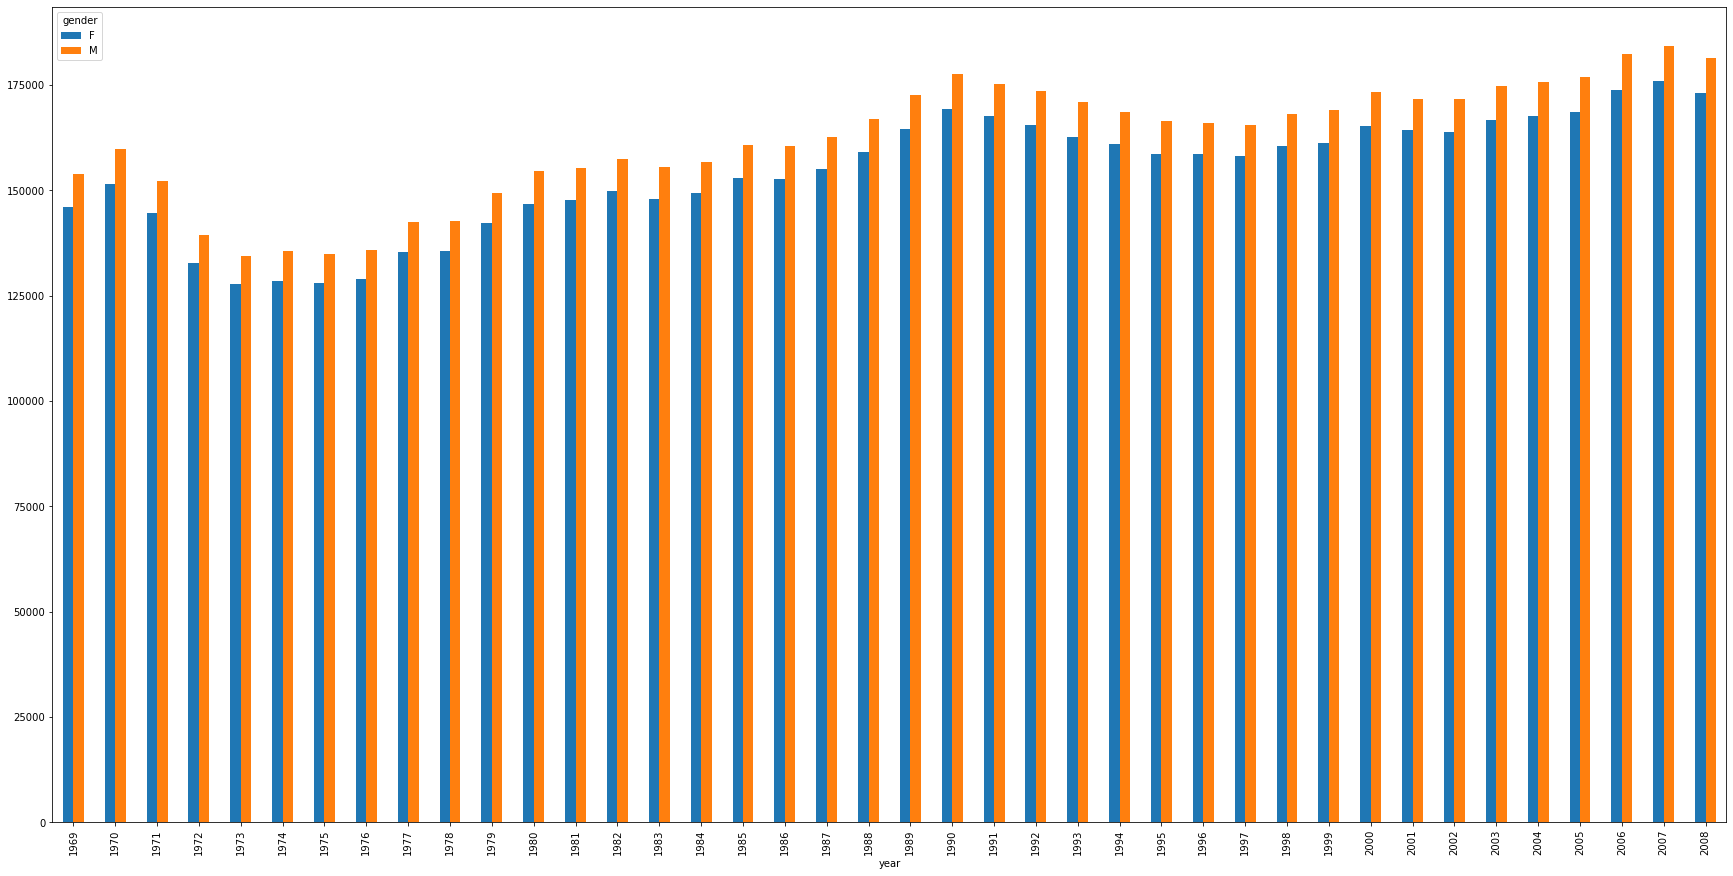

In [5]:
#solution code
plt.rcParams["figure.figsize"] = [30.0,15.0]
pivot = pd.pivot_table(data=birth, values='births', columns='gender', index='year', aggfunc=lambda num : sum(num)/12)
pivot.plot.bar()



### Question 8)

Read the "tip.csv" file as a DataFrame object. Add a column presents tip percentage of total bill and generate a KDE (Kernel Density Estimate) plot.


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill', ylabel='tip/bill'>

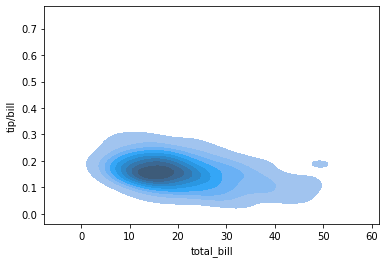

In [3]:
# solution code
df = pd.read_csv("tip.csv")
df['tip/bill'] = df['tip'] / df['total_bill']

df
sns.kdeplot(df['total_bill'],df['tip/bill'] ,shade = True)


### Question 9)
Group the tip data by sex and smoker to present mean and standard deviation scores for tip percentage.

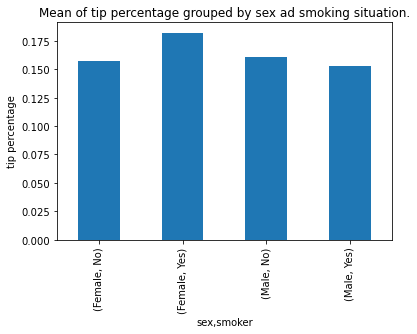

In [4]:
# solution code
gp = df.groupby(['sex','smoker'])

x= gp['tip/bill'].mean().plot.bar()
plt.ylabel("tip percentage")
plt.title("Mean of tip percentage grouped by sex ad smoking situation.")
plt.show()

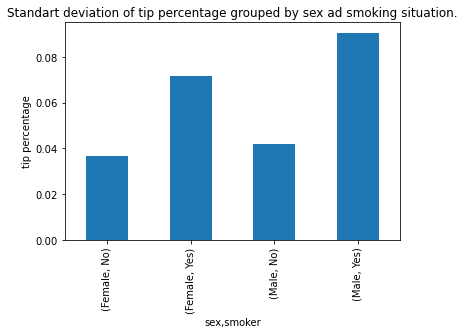

In [5]:
y= gp['tip/bill'].std().plot.bar()
plt.title("Standart deviation of tip percentage grouped by sex ad smoking situation.")
plt.ylabel("tip percentage")
plt.show()


### Question 10)
Create a stacked bar plot displaying the frequency of data points for each size on each day

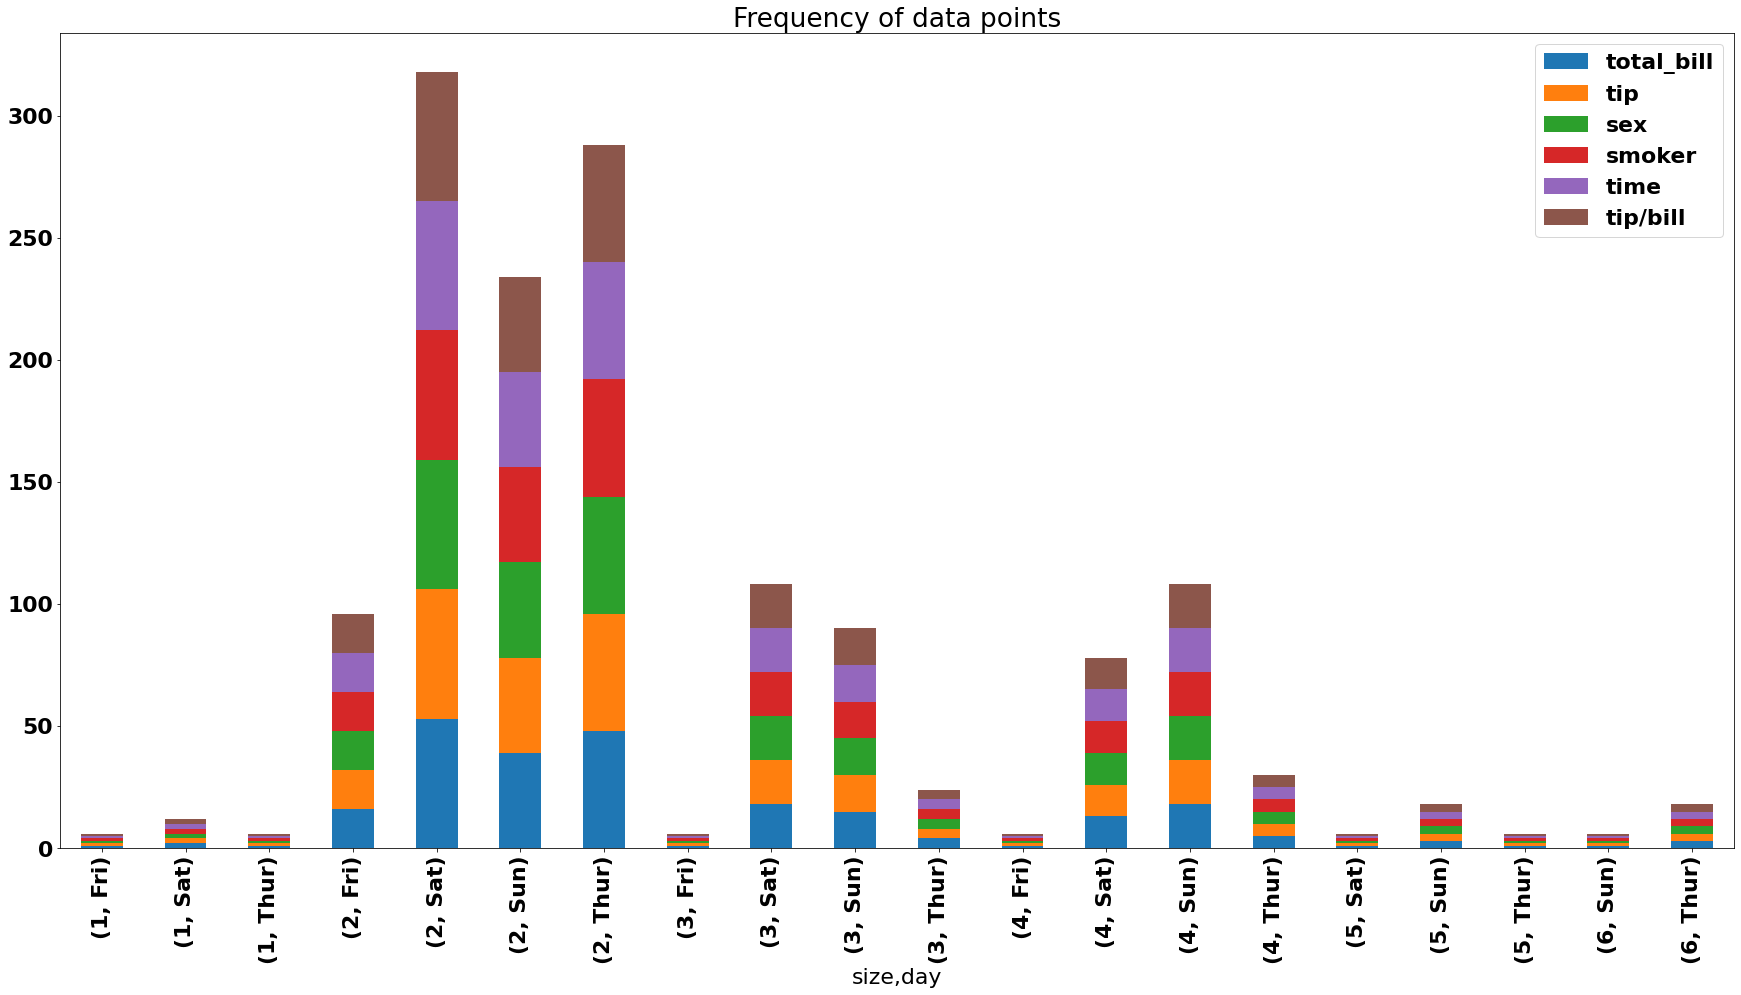

In [47]:
# solution code
gp2 = df.groupby(['size','day']).count()
gp2.plot(kind = 'bar', stacked = True, title= 'Frequency of data points')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 2}

plt.rc('font', **font)
plt.show()


### Question 11)

Create a new stacked bar plot that has normalized values from a graph at Q10 so that each row sums to 1.

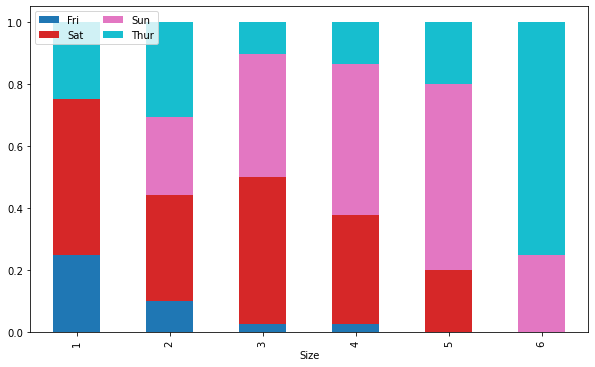

In [63]:
# solution code
cross_tab_prop = pd.crosstab(index= df['size'],
                             columns=df['day'],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Size")
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 10}

plt.rc('font', **font)
plt.show()